In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
data= pd.read_csv("C:/Users/anuja/OneDrive/Desktop/Toyota Corollo.CSV")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


###  Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data= data.copy()

In [7]:
data=data.rename({"Age_08_04":"Age","KM":'Km',"HP":"Hp","Quarterly_Tax":"Qt"},axis=1)
print(data.head(5))

   Id                                           Model  Price  Age  Mfg_Month  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23         10   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23         10   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24          9   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26          7   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30          3   

   Mfg_Year     Km Fuel_Type  Hp  Met_Color  ... Central_Lock  \
0      2002  46986    Diesel  90          1  ...            1   
1      2002  72937    Diesel  90          1  ...            1   
2      2002  41711    Diesel  90          1  ...            0   
3      2002  48000    Diesel  90          0  ...            0   
4      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0       

In [8]:
# Since it has numerous nos of columns we are extracting only the columns we need for analysis
data=data[["Price","Age","Km","Hp","cc","Doors","Gears","Qt","Weight"]]
data.head()

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
data.isnull().sum()

Price     0
Age       0
Km        0
Hp        0
cc        0
Doors     0
Gears     0
Qt        0
Weight    0
dtype: int64

In [10]:
data.shape

(1436, 9)

In [11]:
data.describe()

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Exploratory data analyasis (EDA)

#### Visualize dataset

C:\Users\anuja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


-0.82670187309842


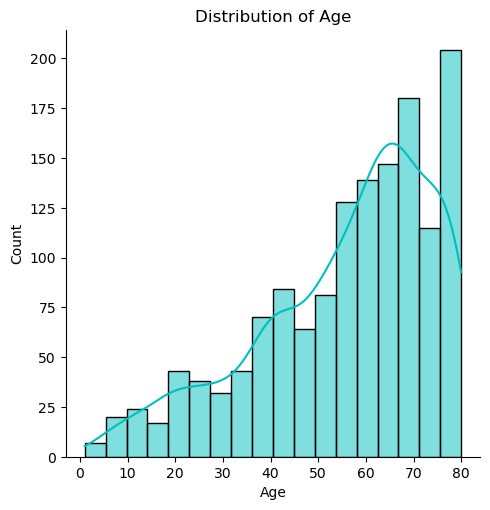

In [12]:
sns.displot(x=data["Age"],color="c",kde=True)
plt.title("Distribution of Age")
print(data["Age"].skew())

Text(0, 0.5, 'Price')

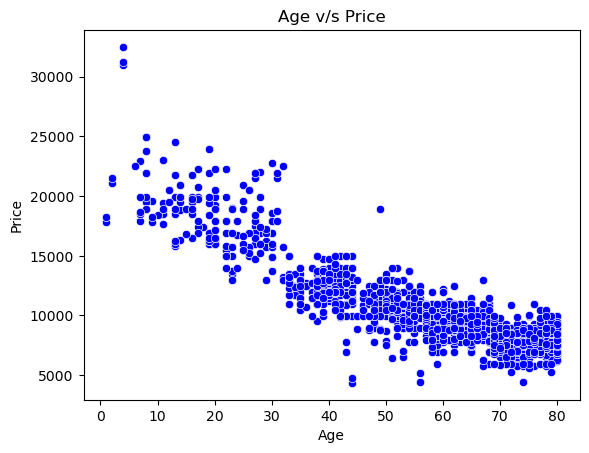

In [13]:
sns.scatterplot(x="Age",y="Price",data=data,color="b")
plt.title("Age v/s Price")
plt.xlabel("Age")
plt.ylabel("Price")

Text(0.5, 1.0, 'Km v/s Price')

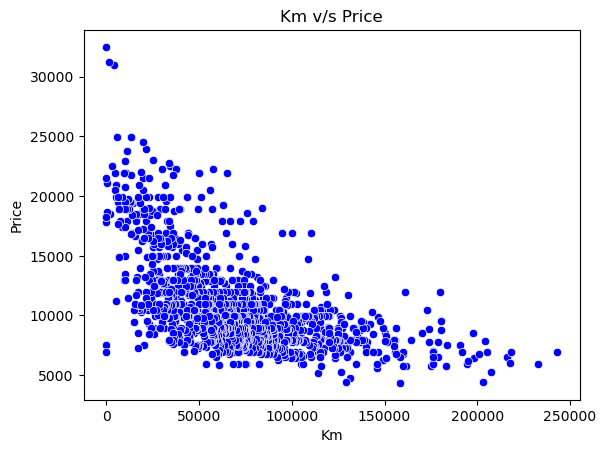

In [14]:
sns.scatterplot(x="Km",y="Price",data=data,color="b")
plt.title("Km v/s Price")

Text(0.5, 1.0, 'Hp v/s Price')

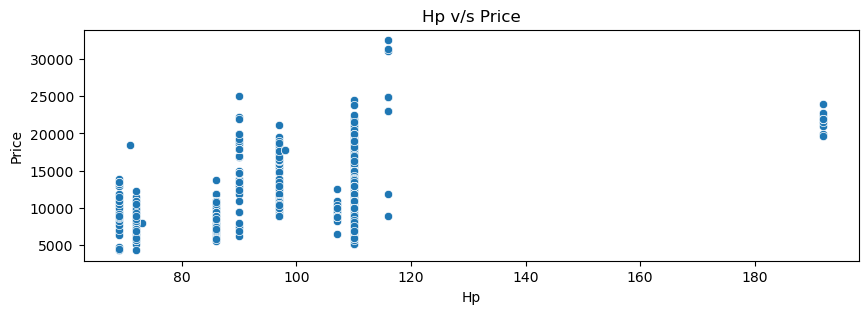

In [15]:
fig =plt.figure(figsize=(10,3))
sns.scatterplot(x="Hp",y="Price",data=data)
plt.title("Hp v/s Price")

Text(0.5, 1.0, 'Hp v/s Price')

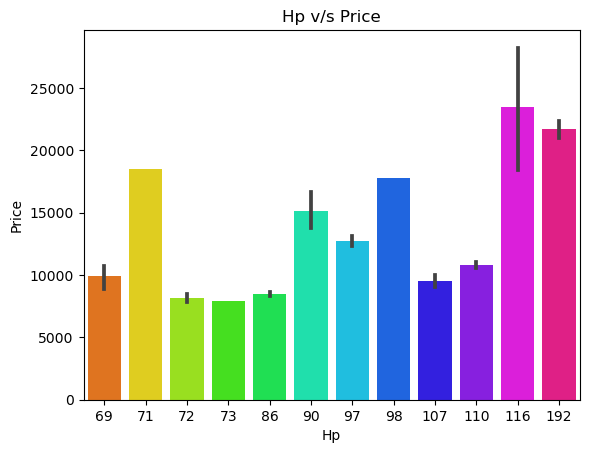

In [16]:
sns.barplot(x="Hp",y="Price",data=data,palette='hsv')
plt.title("Hp v/s Price")

Text(0.5, 1.0, 'Cylinder volume (cm3) v/s Price')

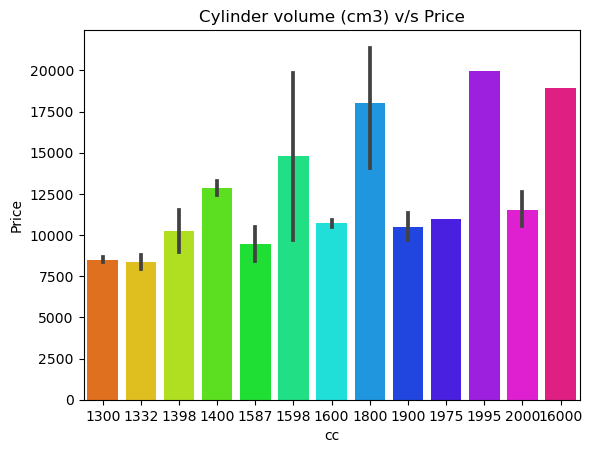

In [17]:
sns.barplot(x="cc",y="Price",data=data,palette='hsv')
plt.title("Cylinder volume (cm3) v/s Price")

Text(0.5, 1.0, 'Doors v/s Price')

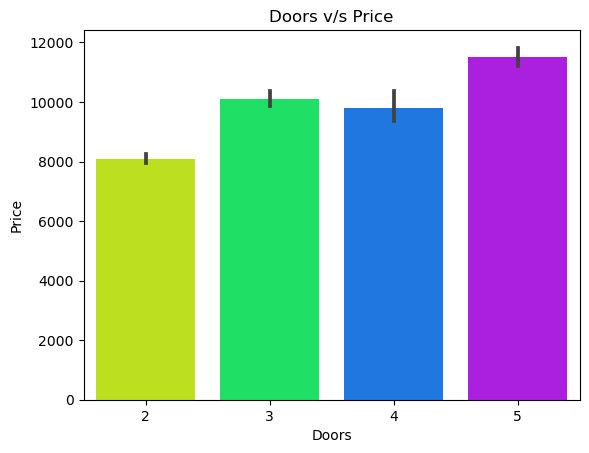

In [18]:
sns.barplot(x="Doors",y="Price",data=data,palette='hsv')
plt.title("Doors v/s Price")

Text(0.5, 1.0, 'Gears v/s Price')

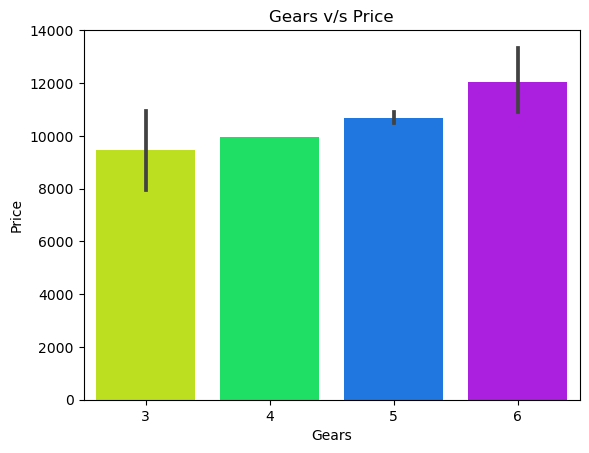

In [19]:
sns.barplot(x="Gears",y="Price",data=data,palette='hsv')
plt.title("Gears v/s Price")

Text(0.5, 1.0, 'Quarterly Road Tax v/s Price')

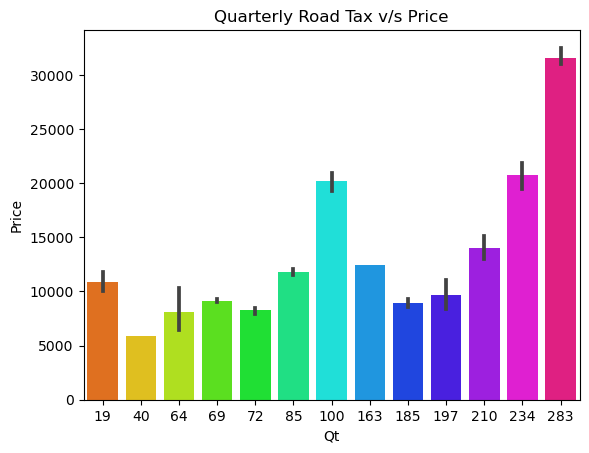

In [20]:
sns.barplot(x="Qt",y="Price",data=data,palette='hsv')
plt.title("Quarterly Road Tax v/s Price")

C:\Users\anuja\AppData\Local\Temp\ipykernel_18528\343145685.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x ="Weight",y ="Price",data=data,palette='tab20')
C:\Users\anuja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anuja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Weight VS Price')

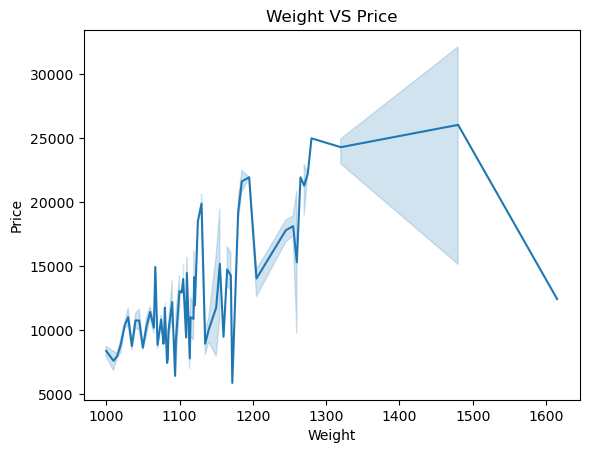

In [21]:
sns.lineplot(x ="Weight",y ="Price",data=data,palette='tab20')
plt.title("Weight VS Price")

This lineplot show the heavier cars cost more though there are some outliers that doesn’t fit nicely.

In [22]:
data.corr()

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
Km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
Hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

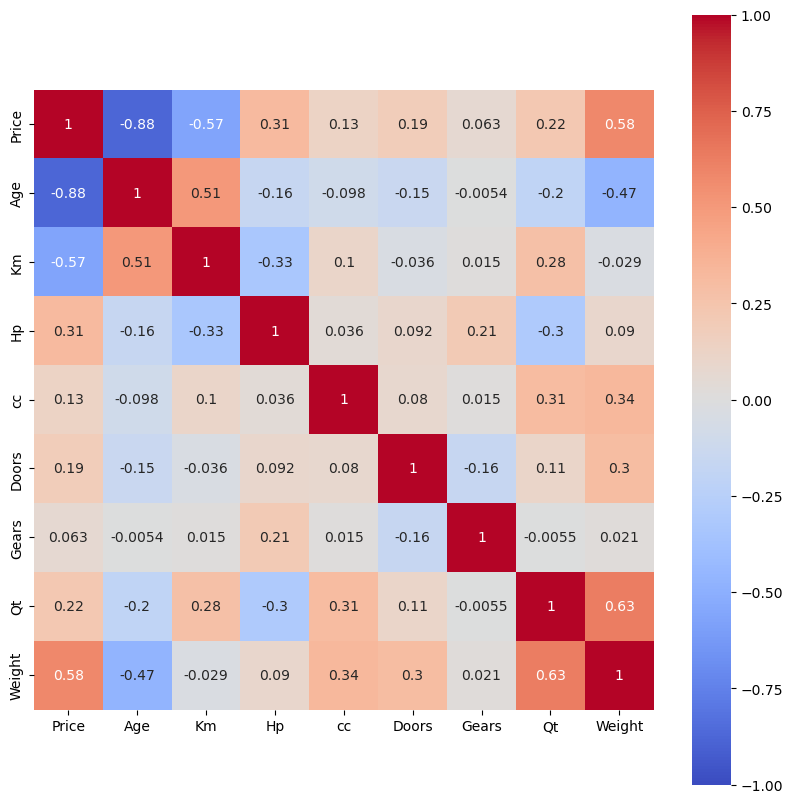

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr('pearson'),vmin= -1, vmax= 1, cmap= 'coolwarm',annot= True,square= True)

* Price is more correlated with 'Age', 'Weight', 'Hp' and 'Km'.
* So for predication model we can take Age,Km,Hp,cc,Doors,Gears,Qt,Weight as independent variables & price as dependent variables.

### checking for outliers--

In [24]:
possible_outlier_cols = ['Price','Age', 'Km', 'Hp', 'cc','Doors','Gears','Qt','Weight'] 
possible_outlier_cols

['Price', 'Age', 'Km', 'Hp', 'cc', 'Doors', 'Gears', 'Qt', 'Weight']

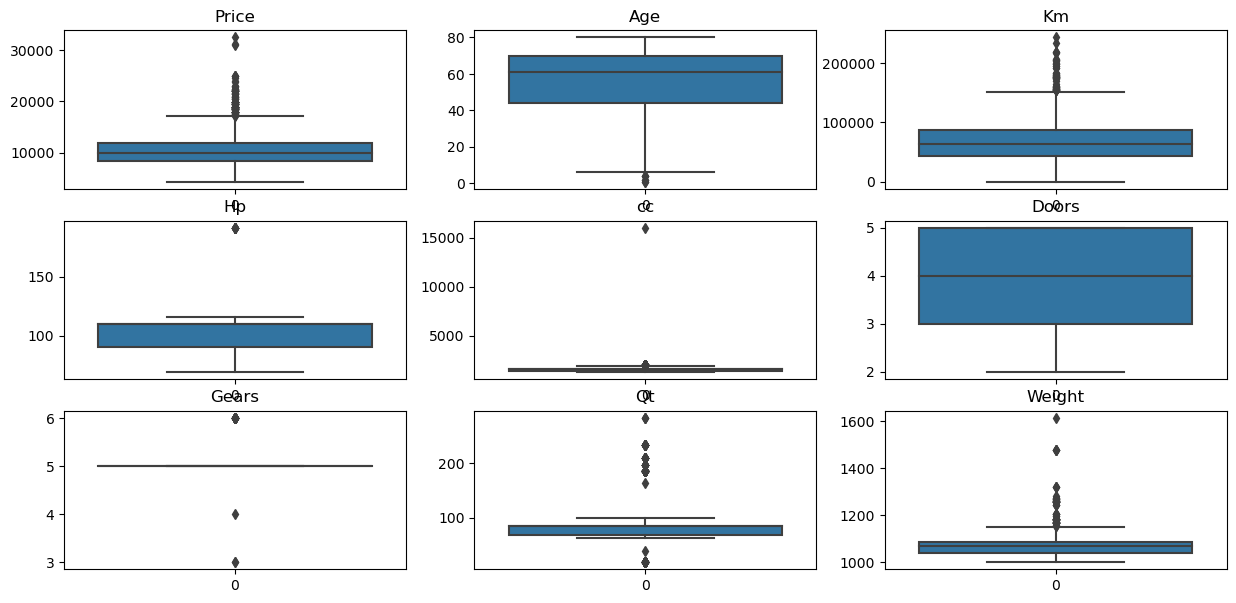

In [25]:
plt.figure(figsize=(15,7))

for index,item in enumerate(possible_outlier_cols):
    ax = plt.subplot(3, 3, index+ 1)
    sns.boxplot(data[item], ax=ax)
    ax.set_title(item)

There are some outliers in Price, Age, Km, Hp, cc, Gears,Qt , Weight.

In [26]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Age'] < lower) | (data['Age'] > upper))
data['Age'] = np.where(data['Age'] < lower, lower, data['Age'])
data['Age'] = np.where(data['Age'] > upper, upper, data['Age'])

In [27]:
Q1 = data['Hp'].quantile(0.25)
Q3 = data['Hp'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Hp'] < lower) | (data['Hp'] > upper))
data['Hp'] = np.where(data['Hp'] < lower, lower, data['Hp'])
data['Hp'] = np.where(data['Hp'] > upper, upper, data['Hp'])

In [28]:
Q1 = data['cc'].quantile(0.25)
Q3 = data['cc'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['cc'] < lower) | (data['cc'] > upper))
data['cc'] = np.where(data['cc'] < lower, lower, data['cc'])
data['cc'] = np.where(data['cc'] > upper, upper, data['cc'])

In [29]:
Q1 = data['Km'].quantile(0.25)
Q3 = data['Km'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Km'] < lower) | (data['Km'] > upper))
data['Km'] = np.where(data['Km'] < lower, lower, data['Km'])
data['Km'] = np.where(data['Km'] > upper, upper, data['Km'])

In [30]:
Q1 = data['Gears'].quantile(0.25)
Q3 = data['Gears'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Gears'] < lower) | (data['Gears'] > upper))
data['Gears'] = np.where(data['Gears'] < lower, lower, data['Gears'])
data['Gears'] = np.where(data['Gears'] > upper, upper, data['Gears'])

In [31]:
Q1 = data['Qt'].quantile(0.25)
Q3 = data['Qt'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Qt'] < lower) | (data['Qt'] > upper))
data['Qt'] = np.where(data['Qt'] < lower, lower, data['Qt'])
data['Qt'] = np.where(data['Qt'] > upper, upper, data['Qt'])

In [32]:
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = ((data['Weight'] < lower) | (data['Weight'] > upper))
data['Weight'] = np.where(data['Weight'] < lower, lower, data['Weight'])
data['Weight'] = np.where(data['Weight'] > upper, upper, data['Weight'])

C:\Users\anuja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1.7038849799952995


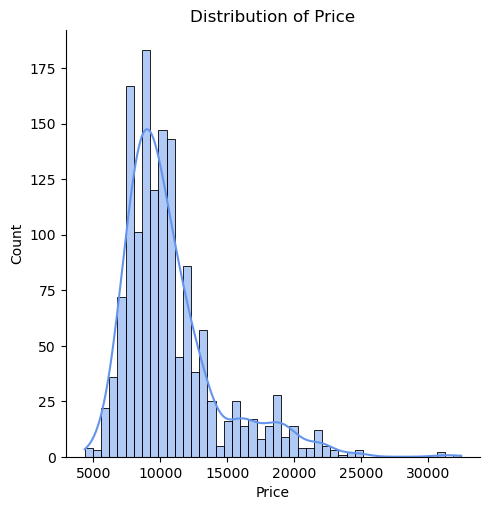

In [33]:
sns.displot(x=data["Price"],color="cornflowerblue",kde=True)
plt.title("Distribution of Price")
print(data["Price"].skew())

In [34]:
q1 = data['Price'].quantile(0.25)
print(f"The Q1 value is {q1}")
q3 = data['Price'].quantile(0.75)
print(f"The Q3 value is {q3}")
IQR = q3 - q1
print(f"The IQR value is {IQR}")
upper = q3 + (1.5*IQR)
print(f"The Upper threshold value is {upper}")
lower = q1 - (1.5*IQR)
print(f"The Lower threshold value is {lower}")

The Q1 value is 8450.0
The Q3 value is 11950.0
The IQR value is 3500.0
The Upper threshold value is 17200.0
The Lower threshold value is 3200.0


In [35]:
outliers = data[(data['Price']<lower) | (data['Price']>upper)]
print(f'The number of outliers in the data is {len(outliers)} out of {len(data)}')
percent = (len(outliers)/len(data))*100
print(f'The percentage of Price outliers is {percent}')

The number of outliers in the data is 110 out of 1436
The percentage of Price outliers is 7.66016713091922


In [36]:
data.loc[data['Price'] > 17200, 'Price'] = 17200

In [37]:
data

,Price,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
0,13500,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1432,10845,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1433,8500,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1434,7250,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


Text(0.5, 1.0, "Box plot of 'Weight'")

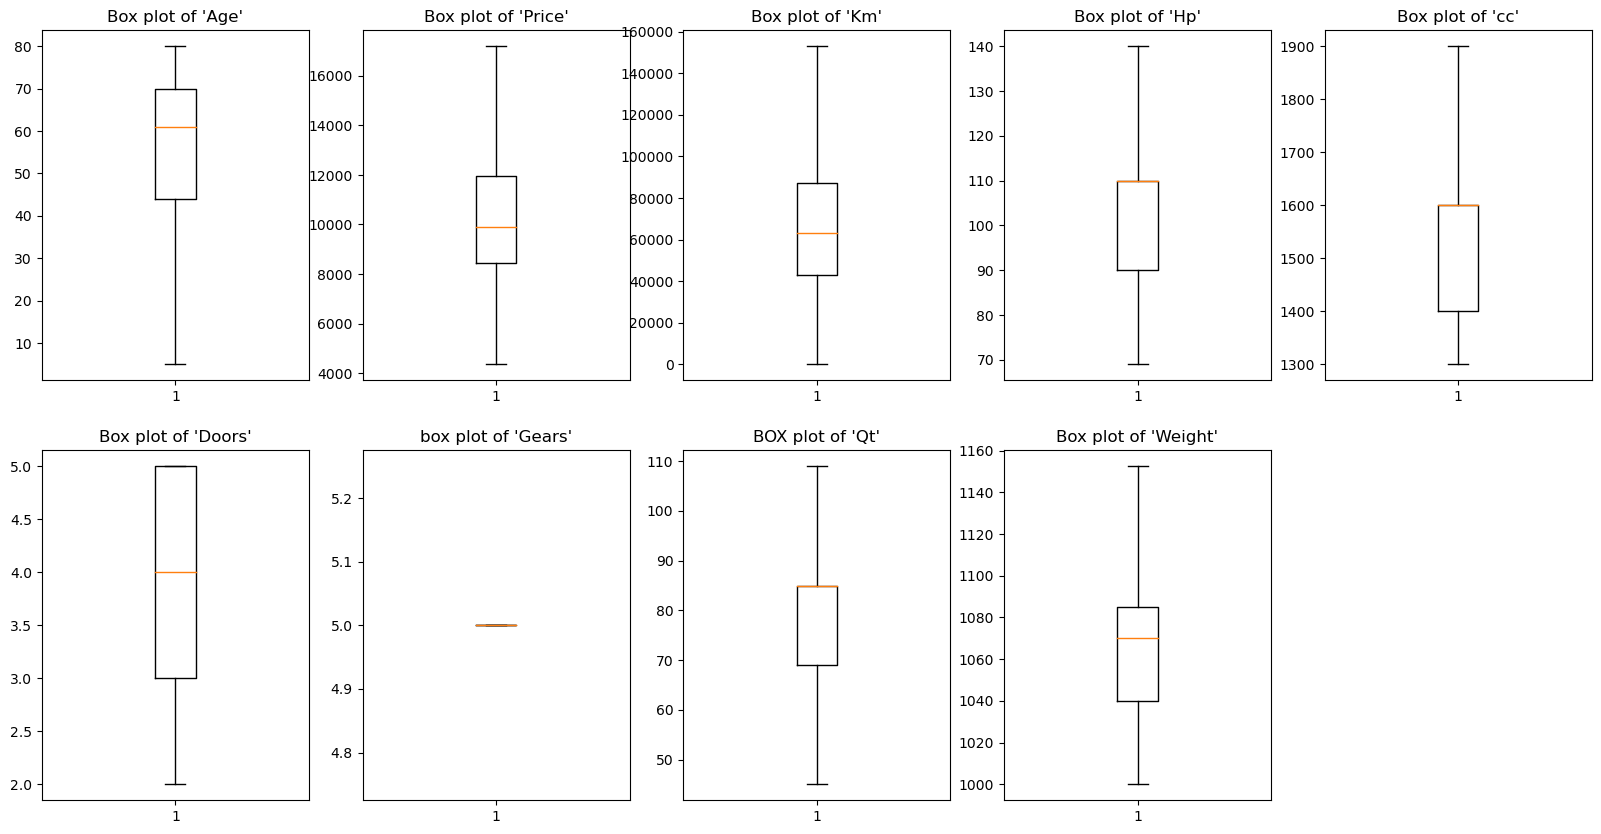

In [39]:
plt.figure(figsize =(20,10))
plt.subplot(2,5,1)
plt.boxplot(data['Age'])
plt.title("Box plot of 'Age'")
plt.subplot(2,5,2)
plt.boxplot(data['Price'])
plt.title("Box plot of 'Price'")
plt.subplot(2,5,3)
plt.boxplot(data['Km'])
plt.title("Box plot of 'Km'")
plt.subplot(2,5,4)
plt.boxplot(data['Hp'])
plt.title("Box plot of 'Hp'")
plt.subplot(2,5,5)
plt.boxplot(data['cc'])
plt.title("Box plot of 'cc'")
plt.subplot(2,5,6)
plt.boxplot(data['Doors'])
plt.title("Box plot of 'Doors'")
plt.subplot(2,5,7)
plt.boxplot(data['Gears'])
plt.title("box plot of 'Gears'")
plt.subplot(2,5,8)
plt.boxplot(data['Qt'])
plt.title("BOX plot of 'Qt'")
plt.subplot(2,5,9)
plt.boxplot(data['Weight'])
plt.title("Box plot of 'Weight'")

#### We can see that no outliers.

### plot regplots  for Age, KM, HP, cc, Doors, Gears, Qt against Price

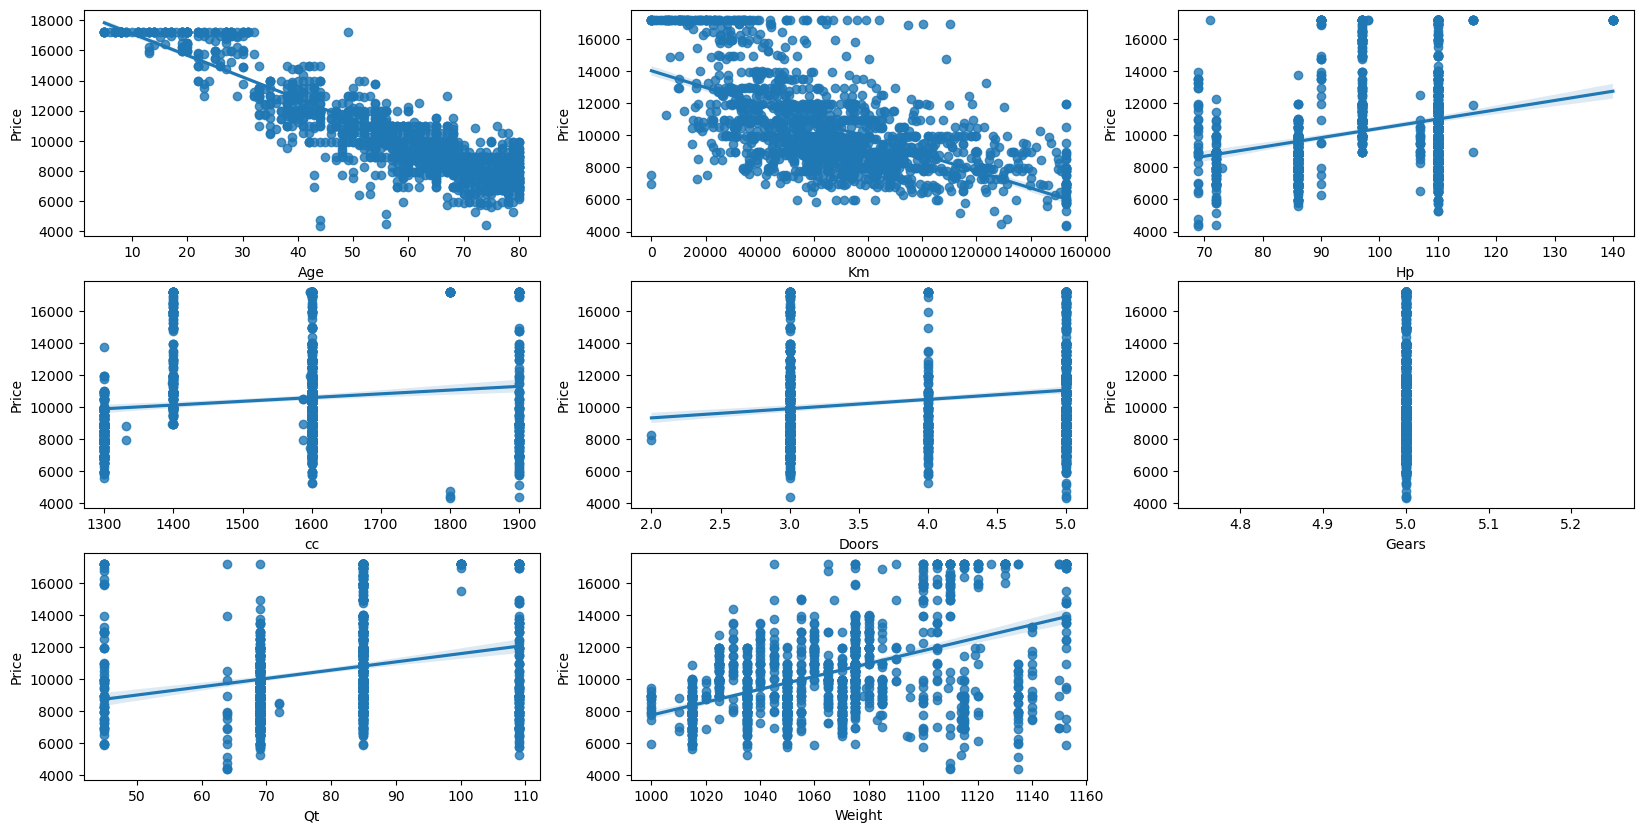

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.regplot(x = 'Age', y = 'Price', data = data)
plt.subplot(3,3,2)
sns.regplot(x = 'Km', y = 'Price', data = data)
plt.subplot(3,3,3)
sns.regplot(x = 'Hp', y = 'Price', data = data)
plt.subplot(3,3,4)
sns.regplot(x = 'cc', y = 'Price', data = data,)
plt.subplot(3,3,5)
sns.regplot(x = 'Doors', y = 'Price', data = data)
plt.subplot(3,3,6)
sns.regplot(x = 'Gears', y = 'Price', data = data)
plt.subplot(3,3,7)
sns.regplot(x = 'Qt', y = 'Price', data = data)
plt.subplot(3,3,8)
sns.regplot(x = 'Weight', y = 'Price', data = data,)
plt.show()

## Model Building (Predication)

In [40]:
X =data[['Age','Km','Hp','cc','Doors','Gears','Qt','Weight']]

In [41]:
X.head(5)

,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5


In [42]:
y=data['Price']

In [43]:
y.head(5)

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [44]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2, random_state=12)

In [45]:
X_train

,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
740,64.0,82723.0,86.0,1300.0,3,5.0,69.0,1015.0
1035,62.0,26000.0,107.0,1600.0,3,5.0,85.0,1085.0
329,43.0,33113.0,110.0,1600.0,5,5.0,85.0,1075.0
1178,72.0,93066.0,110.0,1600.0,5,5.0,85.0,1075.0
730,65.0,85889.0,110.0,1600.0,3,5.0,85.0,1065.0
...,...,...,...,...,...,...,...,...
432,54.0,81905.0,110.0,1600.0,5,5.0,45.0,1105.0
1283,76.0,73116.0,110.0,1600.0,5,5.0,85.0,1075.0
1265,78.0,75226.0,110.0,1600.0,4,5.0,69.0,1035.0
1277,79.0,74093.0,110.0,1600.0,5,5.0,85.0,1075.0


In [46]:
y_train

740      8250
1035    12500
329     11695
1178     8250
730     11500
        ...  
432     10950
1283     8950
1265     8750
1277     8800
1414     7500
Name: Price, Length: 1148, dtype: int64

In [47]:
X_test

,Age,Km,Hp,cc,Doors,Gears,Qt,Weight
341,44.0,29716.0,110.0,1600.0,3,5.0,85.0,1070.0
987,61.0,44597.0,86.0,1300.0,3,5.0,45.0,1015.0
1353,80.0,60476.0,110.0,1600.0,5,5.0,45.0,1114.0
39,27.0,27500.0,97.0,1400.0,3,5.0,85.0,1100.0
1181,80.0,92830.0,86.0,1300.0,3,5.0,69.0,1015.0
...,...,...,...,...,...,...,...,...
103,11.0,16123.0,110.0,1600.0,3,5.0,85.0,1105.0
48,22.0,72215.0,90.0,1900.0,5,5.0,109.0,1152.5
523,49.0,49568.0,110.0,1600.0,3,5.0,45.0,1105.0
313,39.0,37782.0,97.0,1400.0,5,5.0,85.0,1060.0


In [48]:
y_test

341     11950
987      9950
1353     8250
39      14750
1181     6250
        ...  
103     17200
48      17200
523     17200
313     11650
512     13950
Name: Price, Length: 288, dtype: int64

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 8), (288, 8), (1148,), (288,))

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [52]:
X_train

array([[ 0.42289611,  0.41904441, -1.13131604, ...,  0.        ,
        -0.69278894, -1.41760168],
       [ 0.31485455, -1.23045273,  0.4636411 , ...,  0.        ,
         0.39306713,  0.43239988],
       [-0.71154023, -1.02360766,  0.69149212, ...,  0.        ,
         0.39306713,  0.16811394],
       ...,
       [ 1.179187  ,  0.20103267,  0.69149212, ...,  0.        ,
        -0.69278894, -0.88902981],
       [ 1.23320778,  0.16808518,  0.69149212, ...,  0.        ,
         0.39306713,  0.16811394],
       [ 1.28722856, -0.75976605,  0.69149212, ...,  0.        ,
        -0.69278894, -0.4926009 ]])

In [53]:
model= LinearRegression()
print(model)

LinearRegression()


In [54]:
train_model =model.fit(X_train,y_train)
print("model Training is completed")
print(train_model)

model Training is completed
LinearRegression()


In [55]:
### Cross validation
from sklearn.model_selection import cross_val_score
validation_score =cross_val_score(model,X_train,y_train,scoring= 'neg_mean_squared_error',cv=3)

In [56]:
np.mean(validation_score)

-1238008.0523532976

In [57]:
## predication with Test data
y_pred =train_model.predict(X_test)
y_pred

array([12785.24826591,  9116.1584764 ,  8480.9238734 , 15392.62227677,
        6661.69514356,  9265.90728382,  8924.89526315,  6645.18602238,
        8882.54709219,  6864.59956127, 17674.43826954, 11059.73826596,
        8297.56089964,  9612.53689138,  8450.09753092,  9190.38857305,
        8978.25560526, 16385.36229729, 13701.29079534,  9159.20139054,
       12935.85297236, 12323.65027443,  9053.72485087,  7129.6979147 ,
        8745.42913348, 13441.35033243,  9531.04505727, 11002.47781364,
        8006.83336482, 16063.3403654 , 11333.29516497,  8226.14041214,
        9863.97683316, 13221.98269817,  9901.23981913, 12570.94312824,
        8626.49109874,  9104.2884762 ,  8371.158425  , 13440.51419605,
       13304.28541546, 10564.74189447, 12882.86936041,  9310.59884544,
       11639.60017189, 11324.03597525, 10719.53093602, 12805.61372796,
       10188.88448886, 16494.71480342, 11837.46585743, 17924.94449376,
       13864.73280628, 17828.54856353,  8402.13286407, 10164.97732848,
      

In [58]:
print(model.coef_)
print(model.intercept_)

[-1.97956023e+03 -5.68608360e+02  3.89952199e+02 -4.64177932e+02
 -9.06284639e+01  1.13686838e-13  2.30160784e+02  7.47754924e+02]
10472.504355400699


In [59]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse =np.sqrt(mse)
print('mean squared error :',mse)
print('mean absolute_error:',mae)
print(rmse)

mean squared error : 1152890.020516422
mean absolute_error: 824.6836932431947
1073.7271629778313


### R square 
### Formula
#### R^2 =1-SSR/SST
R^2 = Coefficient of determination SSR = Sum of square of residuals SST = total sum of squares.

In [60]:
score=r2_score(y_test,y_pred)
print(score)

0.8715260713764945


### Adjusted R2 =1 [(1-R2)*(n-1)/n-k-1]
where :

R2: The R2 of the model n: The number of observation k: The number of predictor variables.

In [61]:
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8678422311292255


### Assumptions

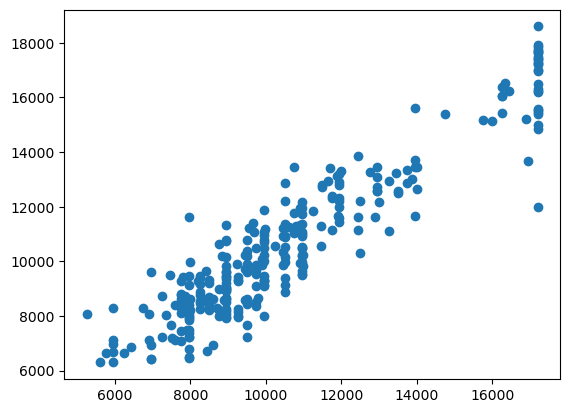

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
## Residuals
Error= y_test-y_pred
print(Error)

341     -835.248266
987      833.841524
1353    -230.923873
39      -642.622277
1181    -411.695144
           ...     
103      -30.616817
48      2360.057431
523     5210.822363
313    -1308.186310
512     2295.815392
Name: Price, Length: 288, dtype: float64


C:\Users\anuja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

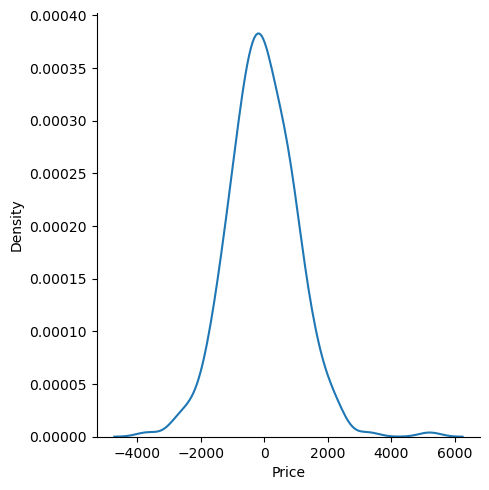

In [64]:
plt.figure(figsize=(10, 10))
sns.displot(Error,kind='kde')

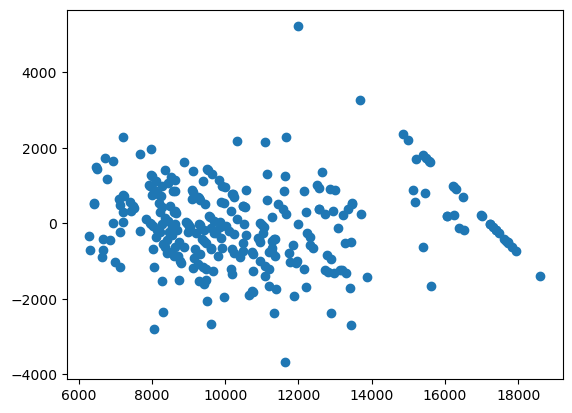

In [66]:
## scatter plot with respect to predication and error
plt.scatter(y_pred,Error)